<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r1_model-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
dfg = pd.read_csv("wat-r1-good.csv")
dfm = pd.read_csv("wat-r1-mal.csv")

In [4]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,...,6,36,8,1,4,0,3,27,9,1
1,83,4,2,4,1,1,5,17,18,2,...,10,60,8,4,4,0,20,85,100,1
2,84,4,2,4,2,2,5,17,18,2,...,12,72,8,8,16,0,20,85,100,1
3,85,4,2,4,3,2,5,17,18,2,...,12,72,8,12,24,0,20,85,100,1
4,86,4,2,4,4,2,5,17,18,2,...,10,60,8,16,32,0,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50096,3251158,2,4,5,2,2,3,9,0,0,...,40,480,8,10,20,200480,15,27,45,1
50097,3251165,2,4,5,3,2,3,9,0,0,...,36,432,8,15,30,300720,15,27,45,1
50098,3251172,2,4,5,4,2,3,9,0,0,...,30,360,8,20,40,400960,15,27,45,1
50099,3251179,2,4,5,5,3,3,9,0,0,...,22,264,8,25,75,751800,15,27,45,1


In [5]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,...,7,49,0,1,4,4,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,...,12,84,8,1,4,0,3,27,9,0
2,79,0,2,4,1,1,5,17,18,2,...,15,105,0,4,4,4,20,85,100,0
3,80,0,2,4,2,2,5,17,18,2,...,16,112,0,8,16,16,20,85,100,0
4,81,0,2,4,3,2,5,17,18,2,...,15,105,0,12,24,24,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71821,2021453,0,1,4,4,2,5,17,29,13,...,1,1,0,16,32,354528,20,85,100,0
71822,2021457,0,1,4,5,3,5,17,29,13,...,1,1,0,20,60,664740,20,85,100,0
71823,2021698,2,0,5,1,1,3,9,1,1,...,1,1,0,5,5,55400,15,27,45,0
71824,2021705,2,0,5,2,2,3,9,1,1,...,1,1,0,10,20,221600,15,27,45,0


In [6]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [7]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [8]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [9]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,...,7,49,0,1,4,4,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,...,12,84,8,1,4,0,3,27,9,0
2,11,2,4,1,1,4,3,9,0,0,...,6,36,8,1,4,0,3,27,9,1
3,79,0,2,4,1,1,5,17,18,2,...,15,105,0,4,4,4,20,85,100,0
4,80,0,2,4,2,2,5,17,18,2,...,16,112,0,8,16,16,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121922,3251158,2,4,5,2,2,3,9,0,0,...,40,480,8,10,20,200480,15,27,45,1
121923,3251165,2,4,5,3,2,3,9,0,0,...,36,432,8,15,30,300720,15,27,45,1
121924,3251172,2,4,5,4,2,3,9,0,0,...,30,360,8,20,40,400960,15,27,45,1
121925,3251179,2,4,5,5,3,3,9,0,0,...,22,264,8,25,75,751800,15,27,45,1


In [10]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,0.073866,0.159707,0.020072,0.011714,-0.018414,-0.051952,-0.066712,-0.087442,-0.114911,...,-0.162445,-0.136701,0.154226,0.021038,0.013265,0.439058,-0.022243,-0.057918,-0.043892,0.389619
outport,0.073866,1.000000,-0.171119,-0.202188,-0.000865,0.001351,0.322170,0.353278,-0.108107,-0.262455,...,-0.091971,-0.083934,0.368480,-0.114477,-0.086761,-0.080926,0.071657,0.341552,0.239070,0.217501
inport,0.159707,-0.171119,1.000000,0.008017,-0.015209,0.023925,-0.413356,-0.519208,-0.467461,-0.252405,...,-0.160758,-0.127476,0.673311,0.032316,0.016819,0.009985,-0.306345,-0.467261,-0.413863,0.327344
cache_coherence_type,0.020072,-0.202188,0.008017,1.000000,0.260562,-0.409243,-0.233227,-0.266014,0.109972,0.032899,...,0.035151,0.035747,-0.092814,0.489558,0.392216,0.300601,0.676150,-0.247846,0.190683,-0.010206
flit_id,0.011714,-0.000865,-0.015209,0.260562,1.000000,0.063696,0.155681,0.117462,0.004329,0.001604,...,0.010093,0.004288,-0.008584,0.949958,0.913949,0.677395,0.340175,0.140310,0.268191,0.006547
flit_type,-0.018414,0.001351,0.023925,-0.409243,0.063696,1.000000,-0.244485,-0.184454,-0.006765,-0.002511,...,0.010866,0.009579,0.013506,-0.014094,0.233982,0.172082,-0.534261,-0.220341,-0.421193,-0.010253
vnet,-0.051952,0.322170,-0.413356,-0.233227,0.155681,-0.244485,1.000000,0.968483,0.610785,0.366587,...,0.037216,0.017214,-0.137135,-0.037147,-0.054394,-0.062876,0.558749,0.990729,0.910107,-0.051955
vc,-0.066712,0.353278,-0.519208,-0.266014,0.117462,-0.184454,0.968483,1.000000,0.589504,0.309824,...,0.059334,0.037661,-0.212537,-0.075539,-0.078006,-0.081884,0.506907,0.992270,0.864320,-0.078365
src_ni,-0.087442,-0.108107,-0.467461,0.109972,0.004329,-0.006765,0.610785,0.589504,1.000000,0.655171,...,0.124260,0.095659,-0.421282,-0.019942,0.007632,-0.015392,0.556557,0.599968,0.663444,-0.119751
src_router,-0.114911,-0.262455,-0.252405,0.032899,0.001604,-0.002511,0.366587,0.309824,0.655171,1.000000,...,0.044093,0.022636,-0.265447,-0.036363,-0.012348,-0.008255,0.305806,0.330905,0.384085,-0.246458


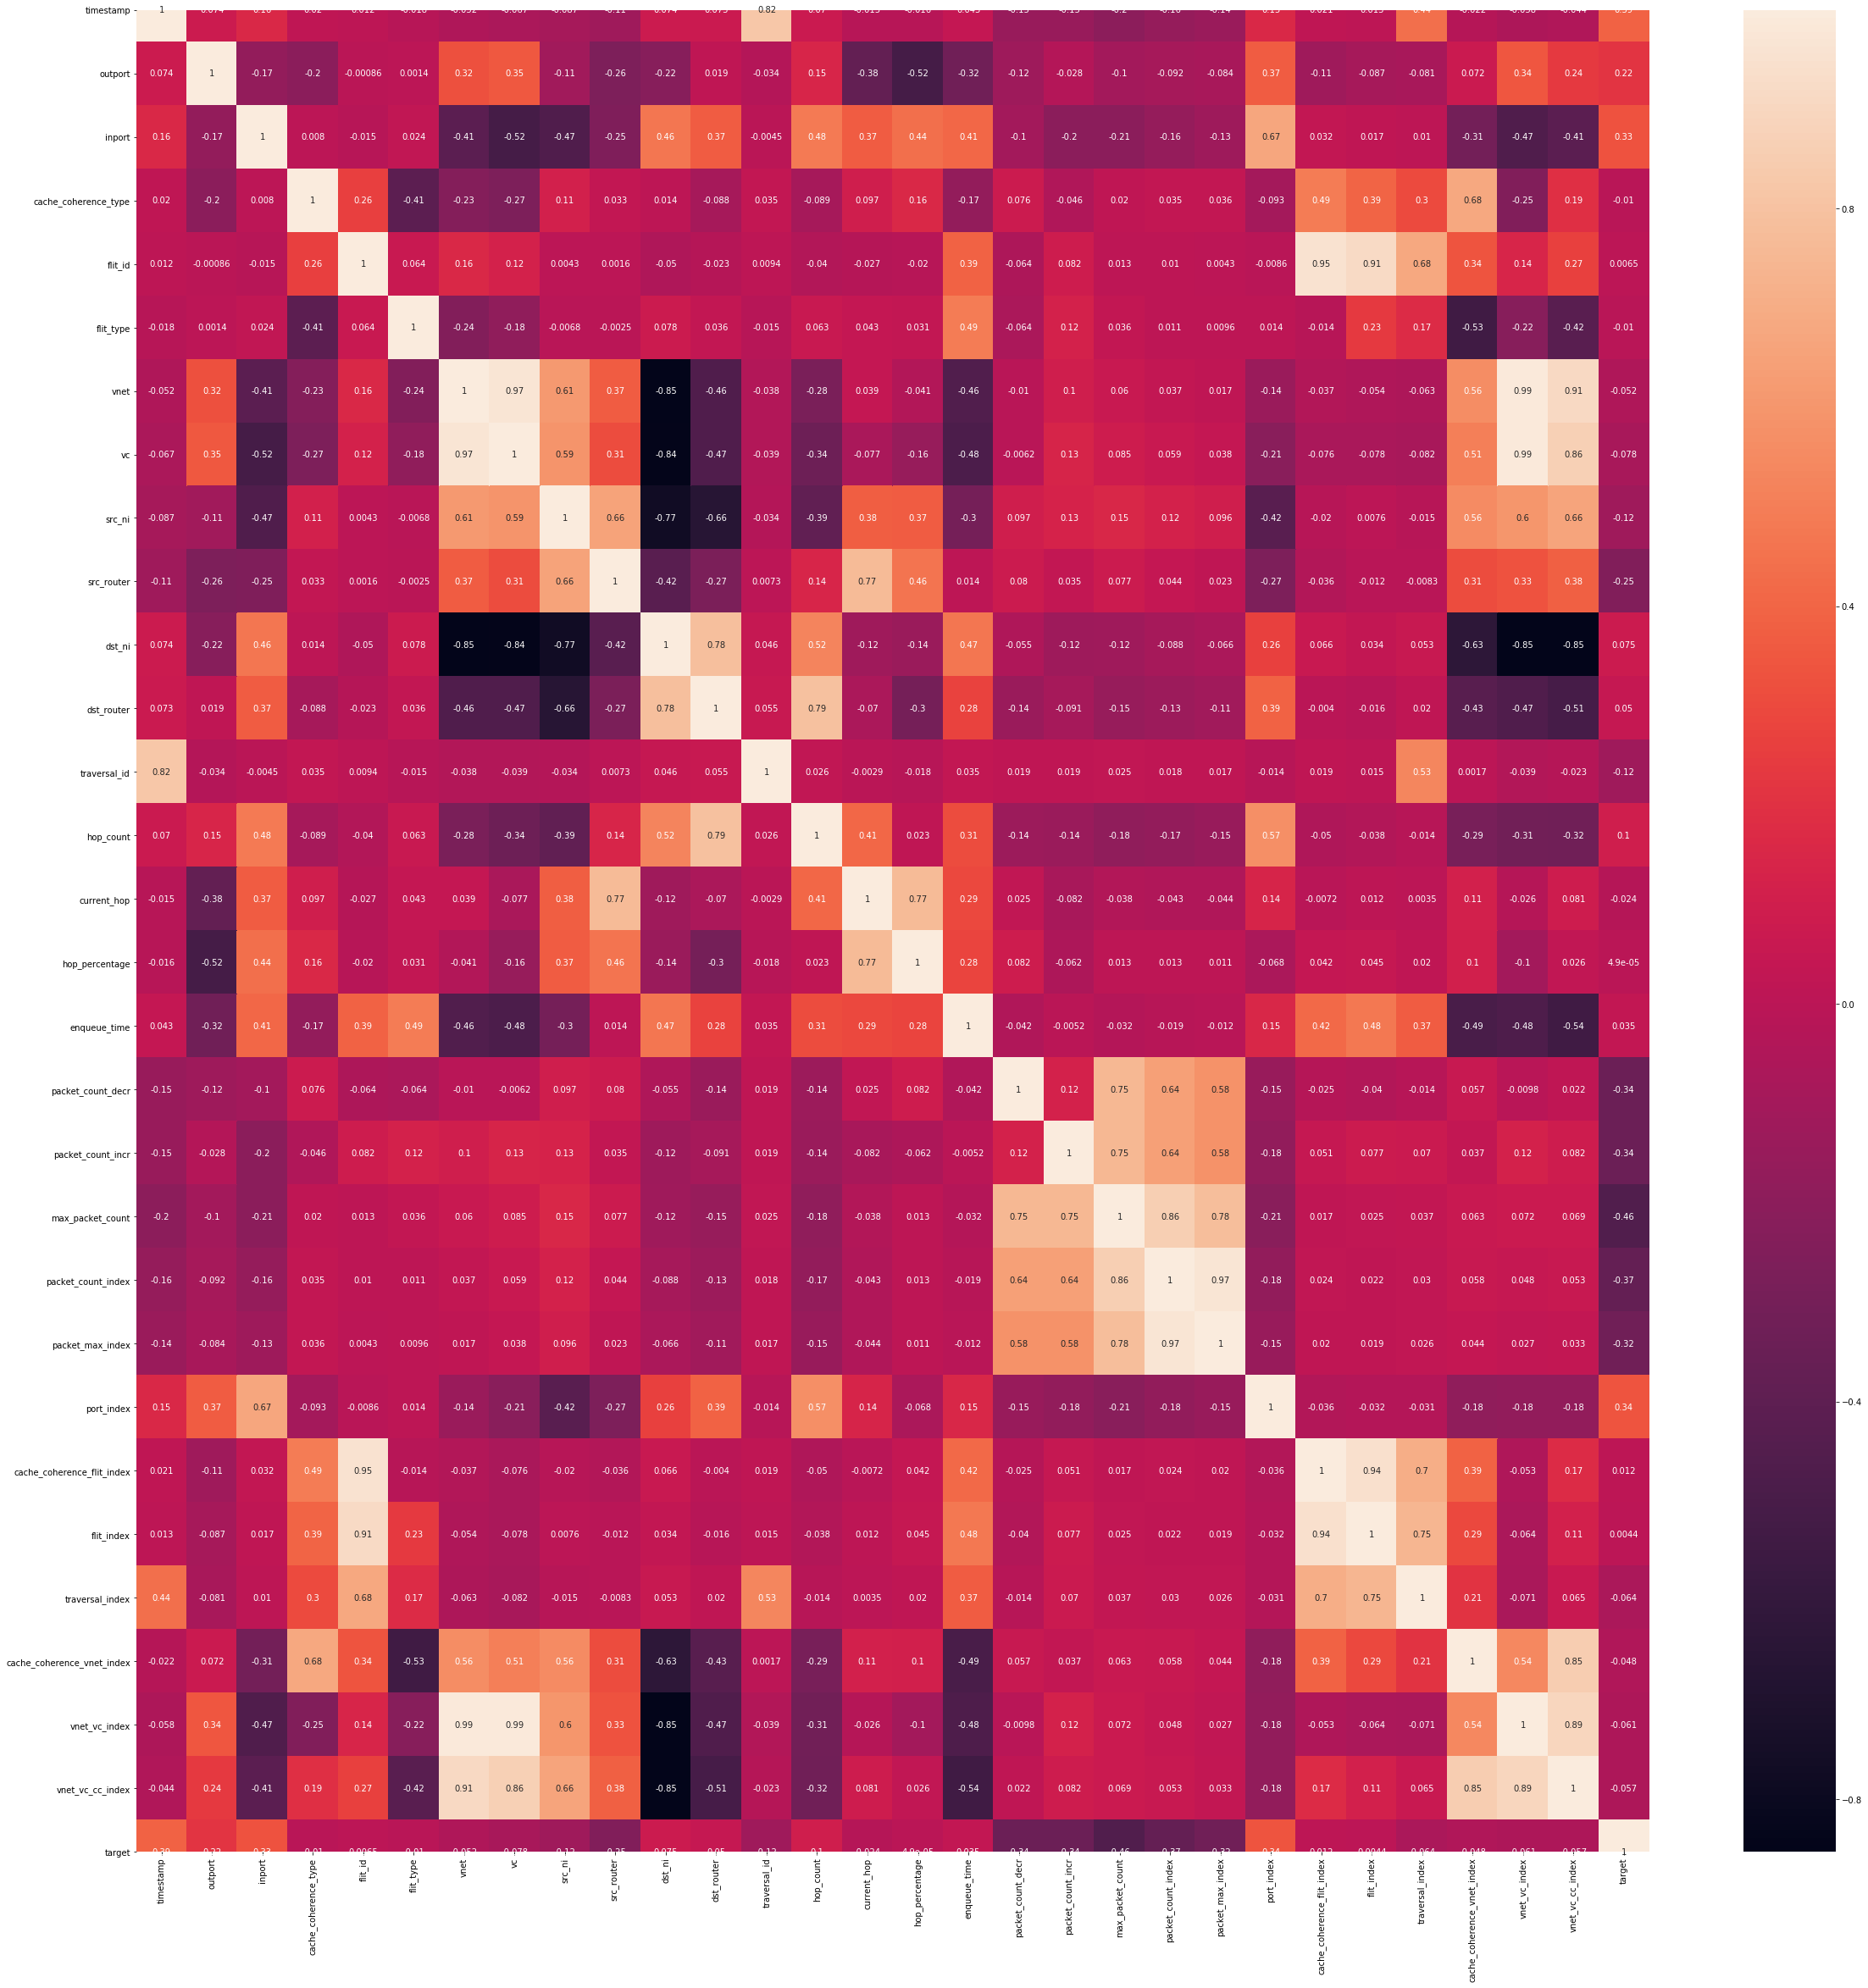

In [11]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [12]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,...,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,23,7,1,...,7,7,49,0,1,4,4,3,27,9
1,2,4,1,1,4,3,9,23,7,0,...,7,12,84,8,1,4,0,3,27,9
2,2,4,1,1,4,3,9,23,7,0,...,6,6,36,8,1,4,0,3,27,9
3,0,2,4,1,1,5,17,1,1,1,...,7,15,105,0,4,4,4,20,85,100
4,0,2,4,2,2,5,17,1,1,1,...,7,16,112,0,8,16,16,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121922,2,4,5,2,2,3,9,22,6,10024,...,12,40,480,8,10,20,200480,15,27,45
121923,2,4,5,3,2,3,9,22,6,10024,...,12,36,432,8,15,30,300720,15,27,45
121924,2,4,5,4,2,3,9,22,6,10024,...,12,30,360,8,20,40,400960,15,27,45
121925,2,4,5,5,3,3,9,22,6,10024,...,12,22,264,8,25,75,751800,15,27,45


In [13]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,...,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000090,...,0.200000,0.023529,0.006049,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,...,0.200000,0.043137,0.010460,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,...,0.166667,0.019608,0.004411,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.032258,0.066667,0.000090,...,0.200000,0.054902,0.013106,0.0,0.103448,0.000000,0.000004,0.944444,0.794521,1.000000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.032258,0.066667,0.000090,...,0.200000,0.058824,0.013989,0.0,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121922,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.709677,0.400000,0.904693,...,0.366667,0.152941,0.060365,1.0,0.310345,0.186047,0.201116,0.666667,0.000000,0.395604
121923,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.709677,0.400000,0.904693,...,0.366667,0.137255,0.054316,1.0,0.482759,0.302326,0.301673,0.666667,0.000000,0.395604
121924,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.709677,0.400000,0.904693,...,0.366667,0.113725,0.045243,1.0,0.655172,0.418605,0.402231,0.666667,0.000000,0.395604
121925,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.709677,0.400000,0.904693,...,0.366667,0.082353,0.033144,1.0,0.827586,0.825581,0.754183,0.666667,0.000000,0.395604


In [14]:
train_X.columns

Index(['outport', 'inport', 'cache_coherence_type', 'flit_id', 'flit_type',
       'vnet', 'vc', 'dst_ni', 'dst_router', 'traversal_id', 'hop_count',
       'current_hop', 'hop_percentage', 'enqueue_time', 'packet_count_decr',
       'packet_count_incr', 'max_packet_count', 'packet_count_index',
       'packet_max_index', 'port_index', 'cache_coherence_flit_index',
       'flit_index', 'traversal_index', 'cache_coherence_vnet_index',
       'vnet_vc_index', 'vnet_vc_cc_index'],
      dtype='object')

In [15]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,...,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.171119,-0.202188,-0.000865,0.001351,0.322170,0.353278,-0.221121,0.019078,-0.034487,...,-0.091971,-0.083934,0.368480,-0.114477,-0.086761,-0.080926,0.071657,0.341552,0.239070,0.217501
inport,-0.171119,1.000000,0.008017,-0.015209,0.023925,-0.413356,-0.519208,0.464556,0.368686,-0.004520,...,-0.160758,-0.127476,0.673311,0.032316,0.016819,0.009985,-0.306345,-0.467261,-0.413863,0.327344
cache_coherence_type,-0.202188,0.008017,1.000000,0.260562,-0.409243,-0.233227,-0.266014,0.013882,-0.087884,0.035405,...,0.035151,0.035747,-0.092814,0.489558,0.392216,0.300601,0.676150,-0.247846,0.190683,-0.010206
flit_id,-0.000865,-0.015209,0.260562,1.000000,0.063696,0.155681,0.117462,-0.049723,-0.022640,0.009405,...,0.010093,0.004288,-0.008584,0.949958,0.913949,0.677395,0.340175,0.140310,0.268191,0.006547
flit_type,0.001351,0.023925,-0.409243,0.063696,1.000000,-0.244485,-0.184454,0.078050,0.035500,-0.014839,...,0.010866,0.009579,0.013506,-0.014094,0.233982,0.172082,-0.534261,-0.220341,-0.421193,-0.010253
vnet,0.322170,-0.413356,-0.233227,0.155681,-0.244485,1.000000,0.968483,-0.850452,-0.463853,-0.037635,...,0.037216,0.017214,-0.137135,-0.037147,-0.054394,-0.062876,0.558749,0.990729,0.910107,-0.051955
vc,0.353278,-0.519208,-0.266014,0.117462,-0.184454,0.968483,1.000000,-0.840442,-0.466034,-0.038959,...,0.059334,0.037661,-0.212537,-0.075539,-0.078006,-0.081884,0.506907,0.992270,0.864320,-0.078365
dst_ni,-0.221121,0.464556,0.013882,-0.049723,0.078050,-0.850452,-0.840442,1.000000,0.784941,0.045991,...,-0.088137,-0.066243,0.264854,0.066338,0.034091,0.053024,-0.632513,-0.849777,-0.852608,0.075220
dst_router,0.019078,0.368686,-0.087884,-0.022640,0.035500,-0.463853,-0.466034,0.784941,1.000000,0.055159,...,-0.132340,-0.114211,0.387717,-0.003995,-0.015700,0.020286,-0.426394,-0.467024,-0.505705,0.049767
traversal_id,-0.034487,-0.004520,0.035405,0.009405,-0.014839,-0.037635,-0.038959,0.045991,0.055159,1.000000,...,0.018241,0.017118,-0.014384,0.019203,0.014768,0.531640,0.001681,-0.038816,-0.022906,-0.120309


In [16]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.64894488, -0.58167798,  1.12720849, ..., -0.42048508,
         0.2037091 ,  0.14312388],
       [-1.17985237, -1.04458142,  0.19417825, ..., -0.2612297 ,
         0.32731373, -0.12405735],
       [-1.18208239, -1.04899514,  0.18991562, ..., -0.29148007,
         0.29306108, -0.12575219],
       ...,
       [-0.83019465, -0.0718037 , -0.79523449, ...,  0.52680074,
        -0.05996826, -0.19769899],
       [-0.86311132,  0.24090666, -1.13666379, ...,  0.56018567,
        -0.14058299, -0.13975863],
       [-1.14783925, -0.88618297,  0.16332467, ...,  0.49353525,
        -0.10833544, -0.278676  ]])

In [17]:
pca.explained_variance_ratio_

array([0.35898442, 0.14709688, 0.13420395, 0.11533491, 0.06557082,
       0.04053465, 0.03417099, 0.03236276, 0.02455299])

Text(0, 0.5, 'Variance')

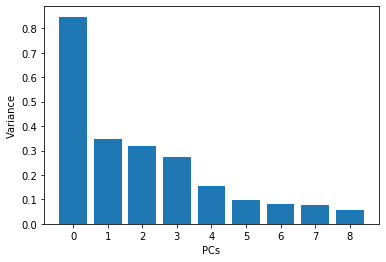

In [18]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [19]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.648945,-0.581678,1.127208,0.504565,0.615123,-0.103176,-0.420485,0.203709,0.143124
1,-1.179852,-1.044581,0.194178,-0.257829,0.678856,0.041939,-0.261230,0.327314,-0.124057
2,-1.182082,-1.048995,0.189916,-0.260239,0.675118,0.039748,-0.291480,0.293061,-0.125752
3,1.074696,0.090882,0.340148,-1.083700,-0.207006,-0.270496,-0.382658,0.258443,-0.119409
4,1.058472,0.261353,0.149799,-0.912602,0.070492,-0.223968,-0.406446,0.255473,-0.071182
...,...,...,...,...,...,...,...,...,...
121922,-0.828951,-0.451888,-0.327994,-0.183684,-0.267633,0.097103,0.558432,-0.054646,-0.135260
121923,-0.829513,-0.261684,-0.561458,-0.031766,-0.191972,0.068066,0.543729,-0.056037,-0.166464
121924,-0.830195,-0.071804,-0.795234,0.120047,-0.116435,0.038780,0.526801,-0.059968,-0.197699
121925,-0.863111,0.240907,-1.136664,0.398320,0.230708,0.085350,0.560186,-0.140583,-0.139759


In [20]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,8,target
0,-0.648945,-0.581678,1.127208,0.504565,0.615123,-0.103176,-0.420485,0.203709,0.143124,0
1,-1.179852,-1.044581,0.194178,-0.257829,0.678856,0.041939,-0.261230,0.327314,-0.124057,0
2,-1.182082,-1.048995,0.189916,-0.260239,0.675118,0.039748,-0.291480,0.293061,-0.125752,1
3,1.074696,0.090882,0.340148,-1.083700,-0.207006,-0.270496,-0.382658,0.258443,-0.119409,0
4,1.058472,0.261353,0.149799,-0.912602,0.070492,-0.223968,-0.406446,0.255473,-0.071182,0
...,...,...,...,...,...,...,...,...,...,...
121922,-0.828951,-0.451888,-0.327994,-0.183684,-0.267633,0.097103,0.558432,-0.054646,-0.135260,1
121923,-0.829513,-0.261684,-0.561458,-0.031766,-0.191972,0.068066,0.543729,-0.056037,-0.166464,1
121924,-0.830195,-0.071804,-0.795234,0.120047,-0.116435,0.038780,0.526801,-0.059968,-0.197699,1
121925,-0.863111,0.240907,-1.136664,0.398320,0.230708,0.085350,0.560186,-0.140583,-0.139759,1


In [21]:
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,7.658885e-16,9.519863e-16,2.913793e-16,-5.660516e-16,-8.548554e-16,3.460413e-17,8.028854e-16,-2.804709e-15,-0.128650
1,7.658885e-16,1.000000e+00,-1.289160e-15,-9.687237e-16,-1.354648e-16,-8.215337e-16,-8.287991e-17,6.919975e-16,-1.149716e-15,-0.229395
2,9.519863e-16,-1.289160e-15,1.000000e+00,-9.936292e-16,1.924327e-15,-9.463226e-16,2.328734e-16,-4.947993e-17,-2.093962e-15,-0.265397
3,2.913793e-16,-9.687237e-16,-9.936292e-16,1.000000e+00,-5.242476e-16,1.962778e-15,-7.817361e-17,1.261124e-16,-2.088373e-15,-0.090684
4,-5.660516e-16,-1.354648e-16,1.924327e-15,-5.242476e-16,1.000000e+00,-1.140322e-15,-5.592529e-17,-1.100997e-16,8.352982e-16,-0.022073
5,-8.548554e-16,-8.215337e-16,-9.463226e-16,1.962778e-15,-1.140322e-15,1.000000e+00,7.488462e-16,-7.338326e-16,2.242003e-15,0.176355
6,3.460413e-17,-8.287991e-17,2.328734e-16,-7.817361e-17,-5.592529e-17,7.488462e-16,1.000000e+00,-3.800454e-16,7.150129e-16,-0.306005
7,8.028854e-16,6.919975e-16,-4.947993e-17,1.261124e-16,-1.100997e-16,-7.338326e-16,-3.800454e-16,1.000000e+00,-2.095266e-16,-0.218864
8,-2.804709e-15,-1.149716e-15,-2.093962e-15,-2.088373e-15,8.352982e-16,2.242003e-15,7.150129e-16,-2.095266e-16,1.000000e+00,-0.116594
target,-1.286499e-01,-2.293948e-01,-2.653973e-01,-9.068444e-02,-2.207301e-02,1.763549e-01,-3.060055e-01,-2.188644e-01,-1.165937e-01,1.000000


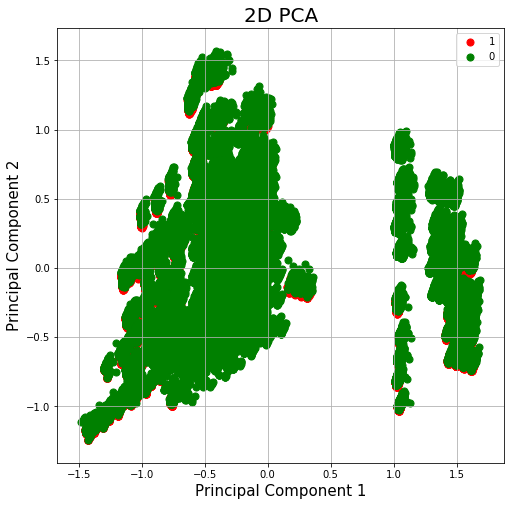

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

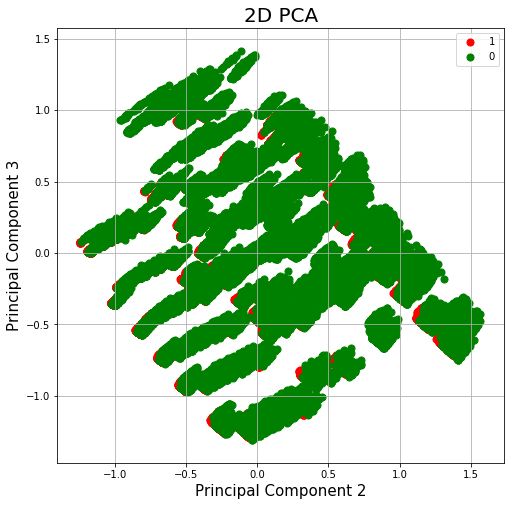

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 1]
               , final_df.loc[indicesToKeep, 2]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [24]:
train_Y = df['target']

In [25]:
train_Y.value_counts()

0    71826
1    50101
Name: target, dtype: int64

In [26]:
seed = 7
np.random.seed(seed)

#### machine learning models

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

                 Specs        Score
19          port_index  5861.772100
16    max_packet_count  3755.468565
1               inport  3468.471748
15   packet_count_incr  1883.511346
14   packet_count_decr  1871.974805
17  packet_count_index  1866.333312
0              outport  1437.346271
18    packet_max_index  1295.166721
6                   vc   227.001495
9         traversal_id   172.953224
24       vnet_vc_index   164.465547
5                 vnet   154.235619
10           hop_count   146.720512
7               dst_ni   126.086029
8           dst_router    82.336813
22     traversal_index    54.353584
25    vnet_vc_cc_index    49.710802


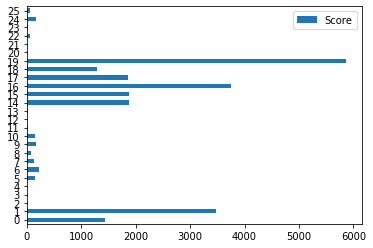

In [29]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

In [30]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [31]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.443209
         Iterations: 35


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                      Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.346      
Dependent Variable:         target                   AIC:                      108124.2640
Date:                       2020-05-07 03:42         BIC:                      108347.6211
No. Observations:           121927                   Log-Likelihood:           -54039.    
Df Model:                   22                       LL-Null:                  -82567.    
Df Residuals:               121904                   LLR p-value:              0.0000     
Converged:                  0.0000                   Scale:                    1.0000     
No. Iterations:             35.0000                                                       
------------------------------------------------------------------------------------------
                            Coef.     Std.Err.     z     P>|z|      [0.025       0.975]   
-------------------------------------

In [32]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 80.53431431672898
Test Prediction  80.58538585744675


In [34]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,dst_ni,10.086792
24,vnet_vc_index,7.448977
20,cache_coherence_flit_index,5.812071
4,flit_type,4.341122
1,inport,3.802613
23,cache_coherence_vnet_index,2.749912
0,outport,2.710318
17,packet_count_index,2.502322
2,cache_coherence_type,2.302356
25,vnet_vc_cc_index,2.074454


In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18740  4285]
 [ 3290 12702]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     23025
           1       0.75      0.79      0.77     15992

    accuracy                           0.81     39017
   macro avg       0.80      0.80      0.80     39017
weighted avg       0.81      0.81      0.81     39017



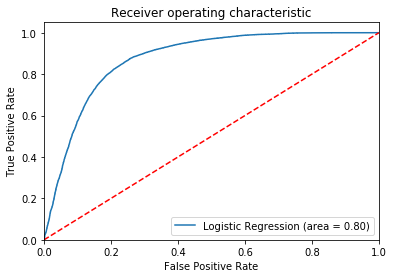

In [37]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [38]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
y_pred_knn= knn.predict(X_test)

In [40]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.68749246170546
Test Prediction  86.85957403183228


In [41]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[19703  3322]
 [ 1805 14187]]


In [42]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.86      0.88     23025
           1       0.81      0.89      0.85     15992

    accuracy                           0.87     39017
   macro avg       0.86      0.87      0.87     39017
weighted avg       0.87      0.87      0.87     39017



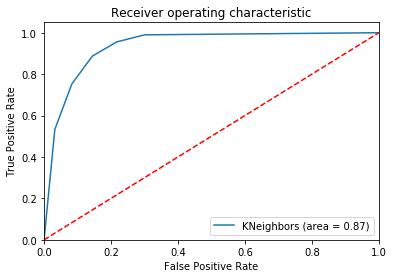

In [43]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [44]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [45]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
y_pred_nb= nb.predict(X_test)

In [47]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 71.20974550717646
Test Prediction Score 71.00238357638979


In [48]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[14216  8809]
 [ 2505 13487]]


In [49]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72     23025
           1       0.60      0.84      0.70     15992

    accuracy                           0.71     39017
   macro avg       0.73      0.73      0.71     39017
weighted avg       0.75      0.71      0.71     39017



In [50]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\DELL\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [52]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66328 samples, validate on 16582 samples
Epoch 1/10
66328/66328 [==============================] - 60s 907us/step - loss: 0.5758 - accuracy: 0.7516 - val_loss: 0.4891 - val_accuracy: 0.7991
Epoch 2/10
66328/66328 [==============================] - 58s 877us/step - loss: 0.4600 - accuracy: 0.8039 - val_loss: 0.4465 - val_accuracy: 0.8031
Epoch 3/10
66328/66328 [==============================] - 60s 902us/step - loss: 0.4369 - accuracy: 0.8066 - val_loss: 0.4329 - val_accuracy: 0.8041
Epoch 4/10
66328/66328 [==============================] - 57s 861us/step - loss: 0.4272 - accuracy: 0.8073 - val_loss: 0.4253 - val_accuracy: 0.8054
Epoch 5/10
66328/66328 [==============================] - 57s 860us/step - loss: 0.4213 - accuracy: 0.8079 - val_loss: 0.4204 - val_accuracy: 0.8061
Epoch 6/10
66328/66328 [==============================] - 63s 945us/step - loss: 0.4174 - accuracy: 0.8089 - val_loss: 0.4169 - val_accuracy: 0.8076
Epoch 7/10
66328/66328 [==============================] 

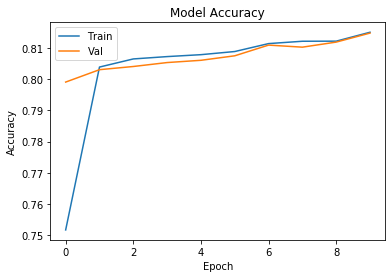

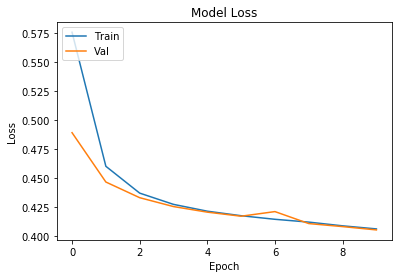

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [54]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.60%


In [55]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 5s 76us/step - loss: 0.2440 - accuracy: 0.5749 - val_loss: 0.2413 - val_accuracy: 0.5908
Epoch 2/10
66336/66336 [==============================] - 5s 73us/step - loss: 0.2414 - accuracy: 0.5879 - val_loss: 0.2405 - val_accuracy: 0.5908
Epoch 3/10
66336/66336 [==============================] - 5s 68us/step - loss: 0.2401 - accuracy: 0.5879 - val_loss: 0.2385 - val_accuracy: 0.5908
Epoch 4/10
66336/66336 [==============================] - 7s 103us/step - loss: 0.2358 - accuracy: 0.5879 - val_loss: 0.2303 - val_accuracy: 0.5908
Epoch 5/10
66336/66336 [==============================] - 5s 77us/step - loss: 0.2166 - accuracy: 0.5972 - val_loss: 0.1970 - val_accuracy: 0.6927
Epoch 6/10
66336/66336 [==============================] - 6s 84us/step - loss: 0.1780 - accuracy: 0.7711 - val_loss: 0.1629 - val_accuracy: 0.7981
Epoch 7/10
66336/66336 [==============================] - 5s 79us/s

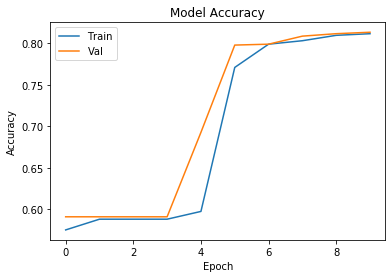

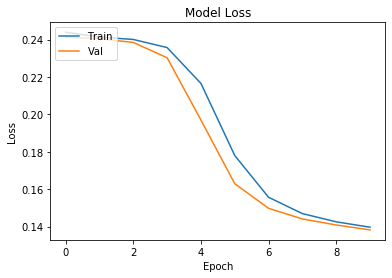

In [56]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [57]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.47%


In [58]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 7s 101us/step - loss: 0.2246 - accuracy: 0.6546 - val_loss: 0.1997 - val_accuracy: 0.7272
Epoch 2/10
66336/66336 [==============================] - 5s 78us/step - loss: 0.1756 - accuracy: 0.7455 - val_loss: 0.1552 - val_accuracy: 0.7996
Epoch 3/10
66336/66336 [==============================] - 7s 100us/step - loss: 0.1448 - accuracy: 0.8088 - val_loss: 0.1391 - val_accuracy: 0.8101
Epoch 4/10
66336/66336 [==============================] - 6s 88us/step - loss: 0.1368 - accuracy: 0.8143 - val_loss: 0.1343 - val_accuracy: 0.8171
Epoch 5/10
66336/66336 [==============================] - 6s 83us/step - loss: 0.1333 - accuracy: 0.8163 - val_loss: 0.1317 - val_accuracy: 0.8160
Epoch 6/10
66336/66336 [==============================] - 6s 93us/step - loss: 0.1311 - accuracy: 0.8178 - val_loss: 0.1298 - val_accuracy: 0.8163
Epoch 7/10
66336/66336 [==============================] - 5s 78us/

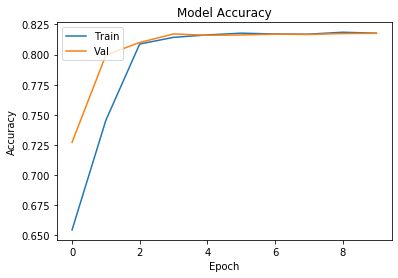

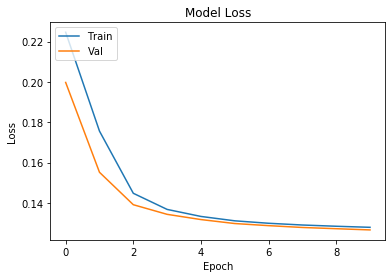

In [59]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [60]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.03%


In [62]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Train on 66336 samples, validate on 16584 samples
Epoch 1/200
66336/66336 [==============================] - 14s 207us/step - loss: 0.1340 - accuracy: 0.8058 - val_loss: 0.1213 - val_accuracy: 0.8220
Epoch 2/200
66336/66336 [==============================] - 10s 152us/step - loss: 0.1216 - accuracy: 0.8201 - val_loss: 0.1135 - val_accuracy: 0.8309
Epoch 3/200
66336/66336 [==============================] - 10s 150us/step - loss: 0.1169 - accuracy: 0.8269 - val_loss: 0.1088 - val_accuracy: 0.8403
Epoch 4/200
66336/66336 [==============================] - 11s 163us/step - loss: 0.1132 - accuracy: 0.8324 - val_loss: 0.1055 - val_accuracy: 0.8461
Epoch 5/200
66336/66336 [==============================] - 10s 149us/step - loss: 0.1111 - accuracy: 0.8372 - val_loss: 0.1044 - val_accuracy: 0.8469
Epoch 6/200
66336/66336 [==============================] - 12s 174us/step - loss: 0.1103 - accuracy: 0.8382 - val_loss: 0.1024 - val_accuracy: 0.8546
Epoch 7/200
66336/66336 [=========================

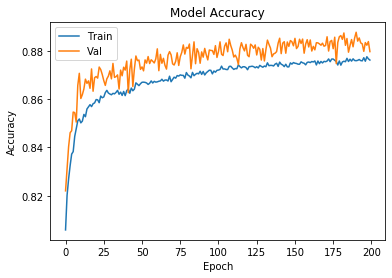

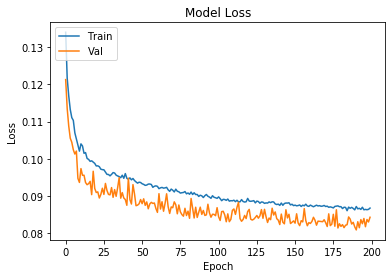

In [63]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [65]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.93%


In [55]:
principal_df[principal_df.duplicated()].shape

(167, 9)

In [56]:
train_X[train_X.duplicated()].shape

(167, 26)

In [51]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.9366903871668073


In [52]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [53]:
y_pred_dt= dt.predict(X_test)

In [54]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 99.33301169943311
Test Prediction Score 94.95091883025349


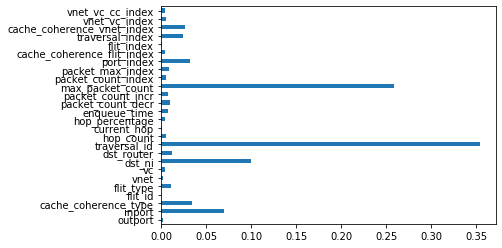

In [55]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

In [56]:
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[21969  1056]
 [  914 15078]]


In [57]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     23025
           1       0.93      0.94      0.94     15992

    accuracy                           0.95     39017
   macro avg       0.95      0.95      0.95     39017
weighted avg       0.95      0.95      0.95     39017



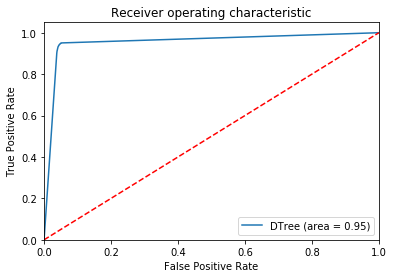

In [58]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [59]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,21,2),
            'n_estimators':[125,250],
            'max_features':range(0,21,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [60]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [61]:
y_pred_rf= rf.predict(X_test)

In [62]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.78169099023036
Test Prediction Score 94.98936361073378


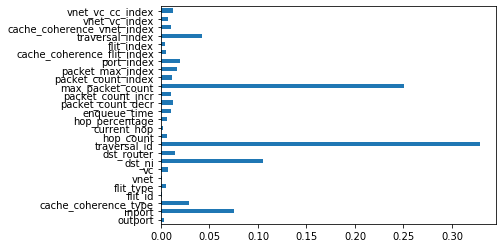

In [63]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

In [64]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[21715  1310]
 [  645 15347]]


In [65]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     23025
           1       0.92      0.96      0.94     15992

    accuracy                           0.95     39017
   macro avg       0.95      0.95      0.95     39017
weighted avg       0.95      0.95      0.95     39017



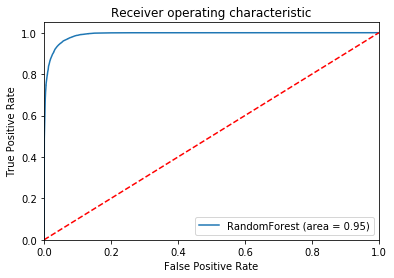

In [66]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [67]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,17,2),
            'n_estimators':[125,250],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [68]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
y_pred_xgbc= xgbc.predict(X_test)

In [70]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.93245688095526
Test Prediction Score 97.0525668298434


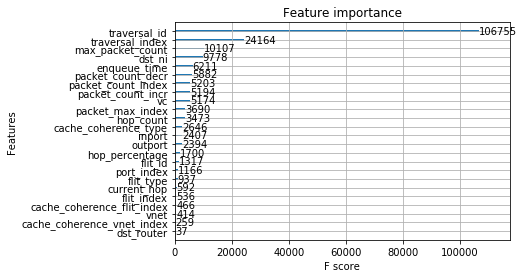

In [71]:
plot_importance(xgbc)
plt.show()

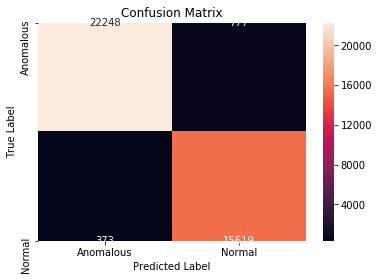

In [72]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     23025
           1       0.95      0.98      0.96     15992

    accuracy                           0.97     39017
   macro avg       0.97      0.97      0.97     39017
weighted avg       0.97      0.97      0.97     39017



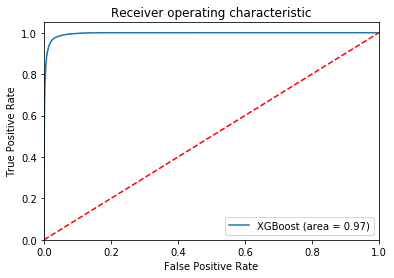

In [74]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [ ]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [ ]:
kscv_roc_auc = roc_auc_score(y_test, y_pred_ksvc)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KSVC (area = %0.2f)' % kscv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KSVC_ROC')
plt.show()

In [75]:
#lightgbm
import lightgbm as lgb

In [65]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

Best parameters: {'learning_rate': 0.2, 'n_estimators': 38}
Accuracy : 0.9121924746743849


In [76]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 25, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=25,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [77]:
y_pred_gbm= gbm.predict(X_test)

In [78]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 96.00168857797613
Test Prediction Score 93.07737652818003


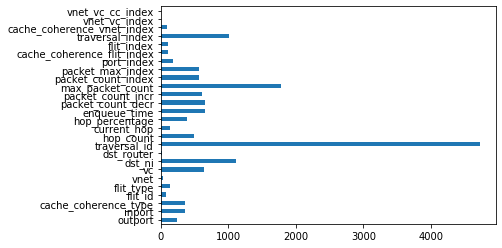

In [79]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

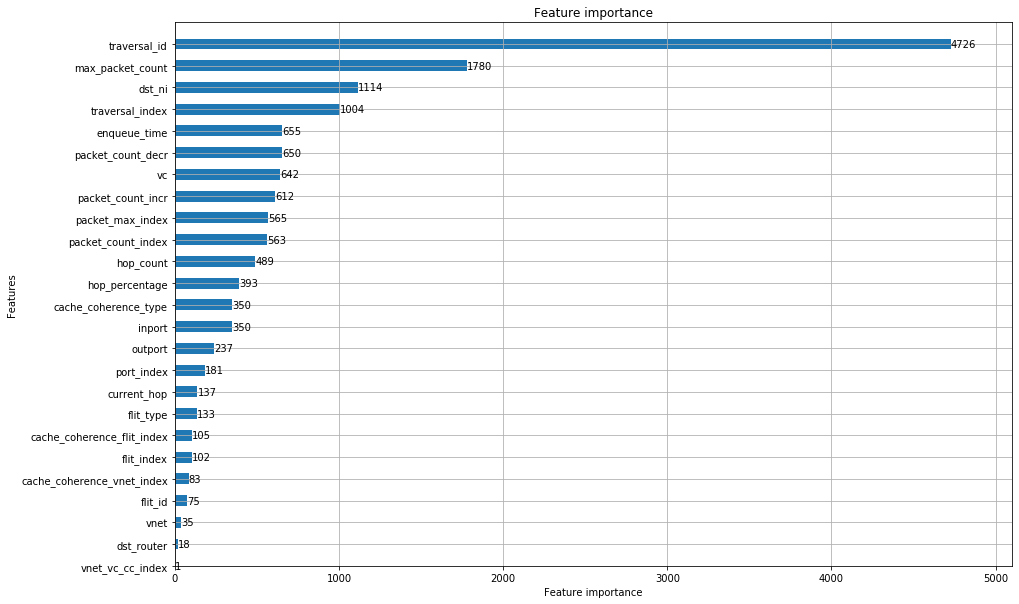

In [82]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 25, xlim = (0,5100), ylim = (0,25), figsize = (15,10))
plt.show()

In [114]:
sorted(gbm.feature_importances_,reverse=True)

[5098,
 1898,
 1041,
 998,
 643,
 630,
 617,
 575,
 536,
 514,
 509,
 476,
 424,
 308,
 274,
 172,
 119,
 68,
 44,
 23,
 20,
 13]

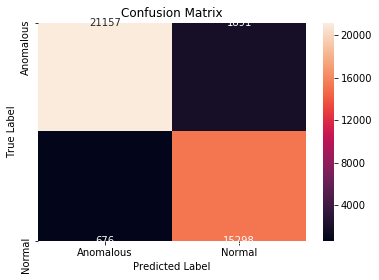

In [115]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [116]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     23048
           1       0.89      0.96      0.92     15974

    accuracy                           0.93     39022
   macro avg       0.93      0.94      0.93     39022
weighted avg       0.94      0.93      0.93     39022



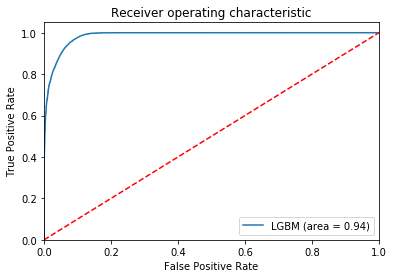

In [117]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()